In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../data/clinical_and_other_features_filtered.csv')

In [4]:
df.columns=df.columns.str.strip()

In [5]:
df.columns = [col.replace('[', '(').replace(']', ')') for col in df.columns]


In [6]:
df.replace('NP', np.nan, inplace=True)
df.replace('NC', np.nan, inplace=True)
df.replace('NA', np.nan, inplace=True)

In [7]:
# drop a column
df.drop('Oncotype score', axis=1, inplace=True)

In [8]:
near_complete_response = ['Overall Near-complete Response:  Looser Definition','Near-complete Response (Graded Measure)']
df.drop(near_complete_response, axis=1, inplace=True)

In [9]:
pathologic_response_to_neoadjuvant_therapy = ['Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy',
       'Pathologic response to Neoadjuvant therapy:  Pathologic stage (N) following neoadjuvant therapy',
       'Pathologic response to Neoadjuvant therapy:  Pathologic stage (M) following neoadjuvant therapy']
df.drop(pathologic_response_to_neoadjuvant_therapy, axis=1, inplace=True)

In [10]:
# df[['Oncotype score']] = df[['Oncotype score']].astype(int)

In [11]:
# for col in df.columns:
#     # if df[col].dtype == 'object':
#     #     df[col] = df[col].astype('category')
#     if df[col].dtype == 'float64':
#         print(f" {col} {df[col].dtype} {df[col].isnull().sum()}")
#         df[col] = df[col].astype('int64', errors='ignore')

In [12]:
X = df.drop("Overall Near-complete Response:  Stricter Definition", axis=1)

In [13]:
y = df["Overall Near-complete Response:  Stricter Definition"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.35,stratify=y,random_state=42)

In [15]:
y_train = y_train.astype("int")

In [16]:
cont_columns = ['Date of Birth (Days)', 'Days to Surgery (from the date of diagnosis)', 'Age at last contact in EMR f/u(days)(from the date of diagnosis) ,last time patient known to be alive, unless age of death is reported(in such case the age of death',
'Age at mammo (days)', 'Days to distant recurrence(from the date of diagnosis)', 'Days to local recurrence (from the date of diagnosis)',
'Days to death (from the date of diagnosis)', 'Days to last local recurrence free assessment (from the date of diagnosis)', 
]
categorical_columns = list(set(X.columns) - set(cont_columns))


In [17]:
for col in cont_columns:
    X_train[col] = X_train[col].astype("float64", errors='ignore')
    X_test[col] = X_test[col].astype("float64", errors='ignore')

In [18]:
for categorical_column in categorical_columns:
    X_train[categorical_column] = X_train[categorical_column].astype("category")
    X_test[categorical_column] = X_test[categorical_column].astype("category")

In [19]:
y.nunique()

4

In [20]:
# multi class classification
clf = xgb.XGBClassifier(
    tree_method="hist", enable_categorical=True, max_cat_to_onehot=1,device="gpu", objective="multi:softmax", num_class=4
)

In [21]:
clf.fit(X_train, y_train)

/home/knan475/anaconda3/envs/prog/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:13:51] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
              max_depth=None, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [22]:
clf.score(X_test, y_test)

0.9090909090909091

In [23]:
clf.save_model("categorical-model.json")


In [24]:
from matplotlib import pyplot


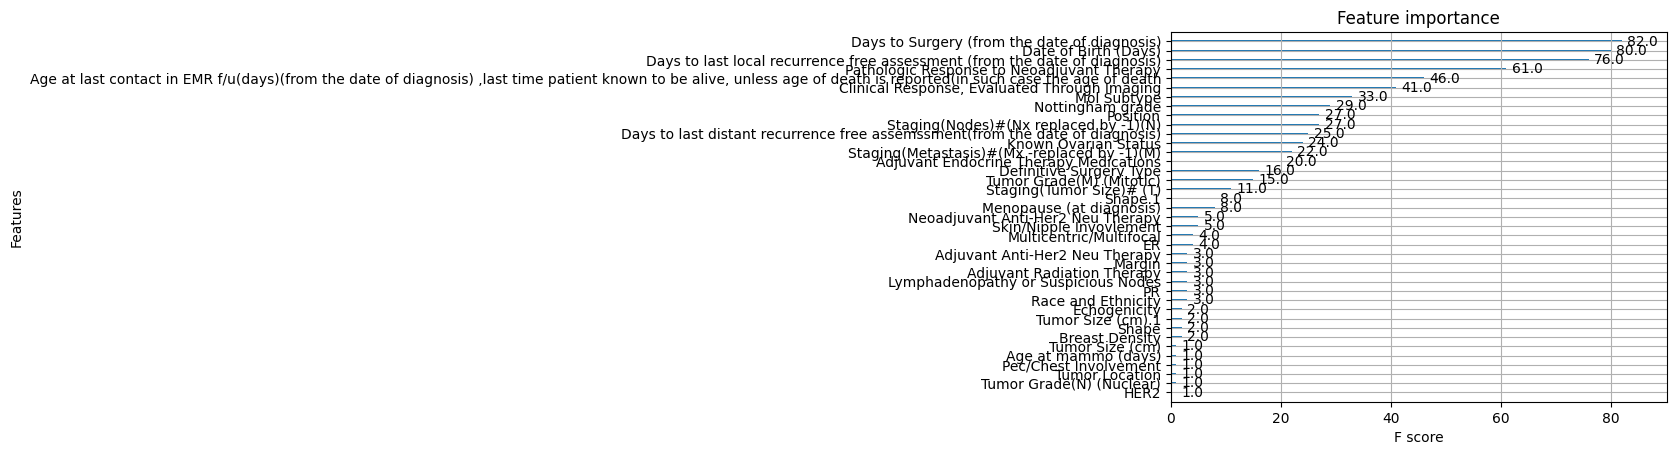

In [34]:
from xgboost import plot_importance
plot_importance(clf)
pyplot.show()